In [1]:
import IPython
from scipy.io import wavfile
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import LSTM, Dropout,Dense, BatchNormalization, GRU
from tensorflow.keras import activations
from tensorflow.keras import regularizers
from pickle import dump

from helper import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
MAX_VAL = 32768
category = 'drums'

## Loading the Model

In [3]:
model = tf.keras.models.load_model('models/' + category + '.h5')

In [5]:
print(tf.__version__)

2.3.0


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 20, 2048)          2050048   
_________________________________________________________________
lstm (LSTM)                  (None, 2048)              33562624  
_________________________________________________________________
repeat_vector (RepeatVector) (None, 20, 2048)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 2048)          33562624  
_________________________________________________________________
time_distributed_1 (TimeDist (None, 20, 1000)          2049000   
Total params: 71,224,296
Trainable params: 71,224,296
Non-trainable params: 0
_________________________________________________________________


## Loading the Data

Songs 0 - 9 were used for training

In [5]:
X, y = preprocess_pipeline(start = 10, end = 12, trainTest = False, category = category)

beginning loading data
10
2
11
2
concatenating data
combinging into one np dataframe
creating chunks
sequencing


# Predicting 

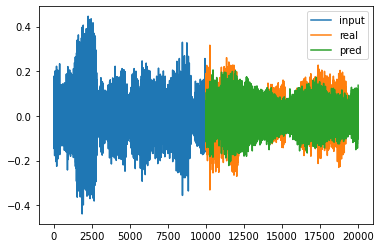

In [6]:
songnum =  4400
song = plot_prediction(X[songnum], y[songnum], model)

In [7]:
IPython.display.Audio((song * MAX_VAL).astype(int), rate=4410)

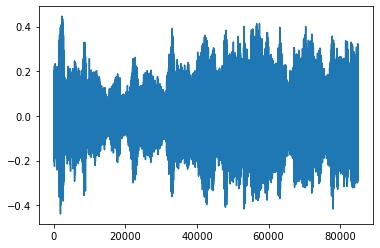

In [8]:
songnum = 4400
pred = predict_many(X[songnum], model, num_predictions = 10, overlap = 5)

In [9]:
IPython.display.Audio((pred * MAX_VAL).astype(int), rate=4410)